In [ ]:
## Plotting Libaray
import matplotlib.pyplot as plt
import seaborn as sns
## Pandas Dataframe Library
import pandas as pd
## Numpy Library
import numpy as np
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Libray to convert text to integer
from sklearn.preprocessing import OneHotEncoder
## OpenCV libraries
import os
import cv2
## Normalize
from sklearn.preprocessing import StandardScaler
## Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
## ImageGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

## Extract Dataset

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## Download Data 

In [ ]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

 99% 771M/778M [00:04<00:00, 224MB/s]
100% 778M/778M [00:04<00:00, 193MB/s]


## Extract Dataset

In [ ]:
import zipfile
with zipfile.ZipFile('/content/covid19-radiography-database.zip', 'r') as zip_ref:
    zip_ref.extractall('covid')

In [ ]:
%rm -rf /content/covid/COVID-19_Radiography_Dataset/COVID/masks
%rm -rf /content/covid/COVID-19_Radiography_Dataset/Lung_Opacity/masks
%rm -rf '/content/covid/COVID-19_Radiography_Dataset/Viral Pneumonia/masks'
%rm -rf /content/covid/COVID-19_Radiography_Dataset/Normal/masks

## Define Constants

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size=32
epochs = 20

In [ ]:
path = '/content/covid/COVID-19_Radiography_Dataset'

## Load Data

In [ ]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(path,labels="inferred",label_mode="int",class_names=None,color_mode="rgb",batch_size=batch_size,
                                                                 image_size=IMAGE_SIZE,shuffle=True,seed=43,validation_split=0.2,subset="training",interpolation="bilinear",follow_links=False,)
data_test = tf.keras.preprocessing.image_dataset_from_directory(path,labels="inferred",label_mode="int",class_names=None,color_mode="rgb",
                                                                batch_size=batch_size,image_size=IMAGE_SIZE,shuffle=True,seed=123,validation_split=0.3,subset="validation",interpolation="bilinear",follow_links=False,)

Found 21165 files belonging to 4 classes.
Using 16932 files for training.
Found 21165 files belonging to 4 classes.
Using 6349 files for validation.


## Number of Class in the dataset

In [ ]:
class_names = data_train.class_names
class_names

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

## Viuslize the Dataset

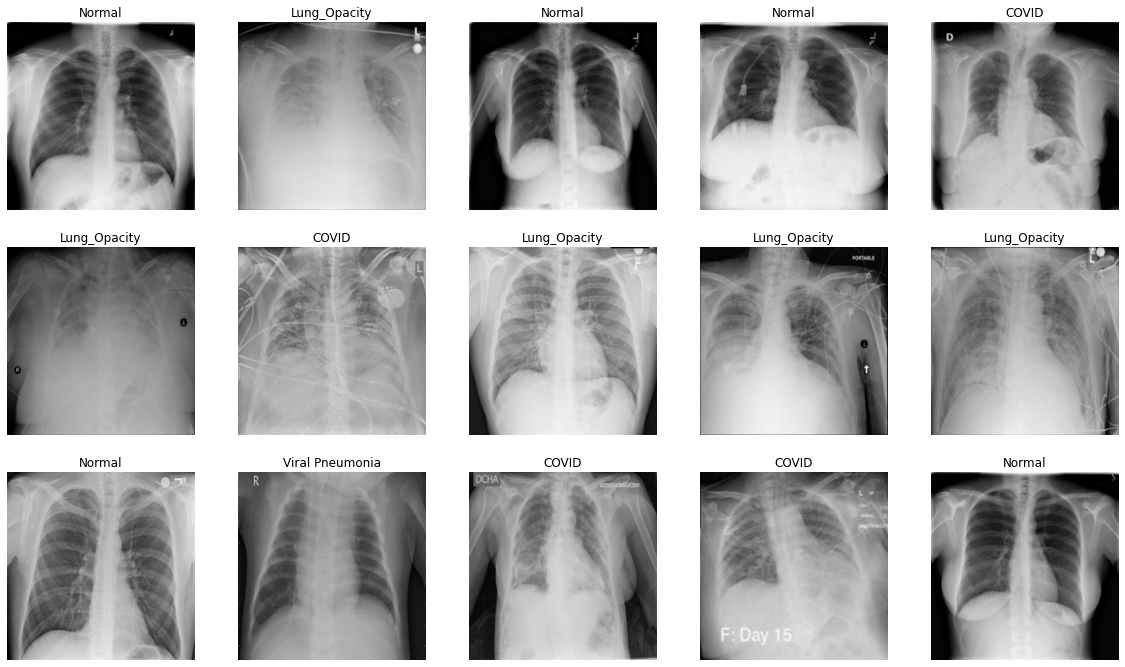

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in data_train.take(1):
    for i in range(15):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Shape of Dataset

In [ ]:
print("Height of the image:",images.shape[1])
print("Width of the image:",images.shape[2])
print("Dimension of image",images.ndim)
print("Data Type of image",images.dtype)

Height of the image: 224
Width of the image: 224
Dimension of image 4
Data Type of image <dtype: 'float32'>


## Create Model

In [ ]:
# Create the Model
CovidModel = keras.Sequential(
    [
       layers.BatchNormalization(),
       layers.Conv2D(32, 3, activation='relu'),
       layers.MaxPooling2D(),
       layers.Conv2D(64, 3, activation='relu'),
       layers.MaxPooling2D(),
       layers.Dropout(0.3),
       layers.Conv2D(128, 3, activation='relu'),
       layers.MaxPooling2D(),
       layers.Dropout(0.2),
       layers.Flatten(),
       layers.Dense(256, activation='relu'),
       layers.Dropout(0.15),
       layers.Dense(4, activation= 'softmax')
    ],
    name="CovidModel",
)

## Compile the Model

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
CovidModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [ ]:
history=CovidModel.fit(data_train,validation_data= data_test,batch_size=batch_size,epochs = 20,callbacks=[early_stopping])

Epoch 1/20
530/530 [==============================] - 96s 160ms/step - loss: 0.8262 - accuracy: 0.7113 - val_loss: 0.5066 - val_accuracy: 0.8089
Epoch 2/20
530/530 [==============================] - 84s 158ms/step - loss: 0.4774 - accuracy: 0.8154 - val_loss: 0.3668 - val_accuracy: 0.8653
Epoch 3/20
530/530 [==============================] - 84s 157ms/step - loss: 0.3774 - accuracy: 0.8570 - val_loss: 0.3103 - val_accuracy: 0.8764
Epoch 4/20
530/530 [==============================] - 84s 158ms/step - loss: 0.3165 - accuracy: 0.8809 - val_loss: 0.2457 - val_accuracy: 0.9075
Epoch 5/20
530/530 [==============================] - 84s 157ms/step - loss: 0.2570 - accuracy: 0.9055 - val_loss: 0.2260 - val_accuracy: 0.9154
Epoch 6/20
530/530 [==============================] - 84s 158ms/step - loss: 0.2177 - accuracy: 0.9174 - val_loss: 0.1886 - val_accuracy: 0.9312
Epoch 7/20
530/530 [==============================] - 84s 158ms/step - loss: 0.1809 - accuracy: 0.9336 - val_loss: 0.1635 - val_ac

In [ ]:
CovidModel.save("model.h5")

## Load Model

In [ ]:
# from keras.models import load_model
# clf = load_model('model.h5')

## Model Summary

In [ ]:
CovidModel.summary()

Model: "CovidModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

## Model Diagram

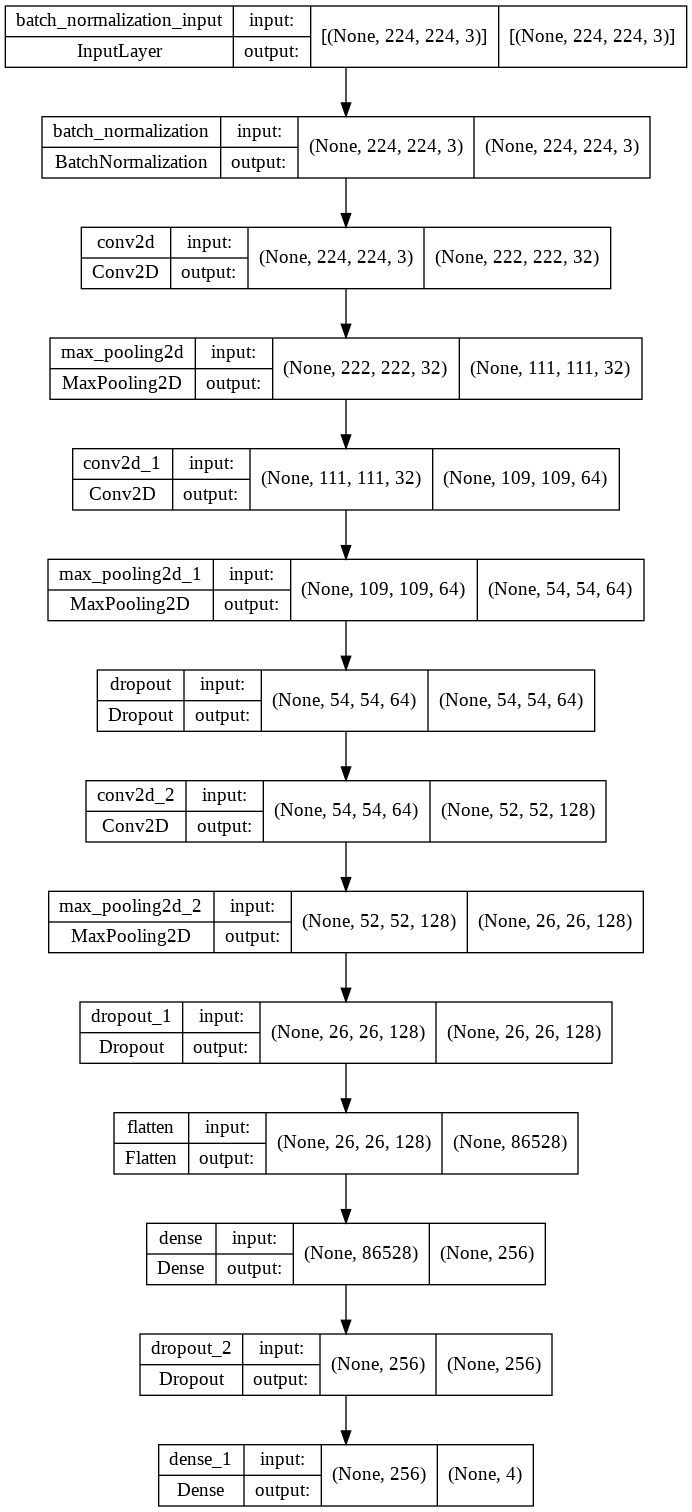

In [ ]:
plot_model(CovidModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Test Accuracy

In [ ]:
test = CovidModel.evaluate(data_test)
print("Accuracy of the model",test[1])

199/199 [==============================] - 16s 76ms/step - loss: 0.1472 - accuracy: 0.9707
Accuracy of the model 0.9707040190696716


## Prediction

In [ ]:
y_pred = np.array([])
y_true =  np.array([])
for x, y in data_test:
  pred = CovidModel.predict(x)
  ## Inverse transformatin
  pred = np.array(list(map(lambda x: np.argmax(x), pred)))
  y_pred = np.concatenate([y_pred, pred])
  y_true = np.concatenate([y_true, y.numpy()])

## Confusion Matrix

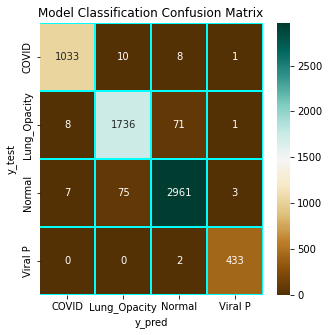

In [ ]:
# Creating the confusion matrix:
gn_cm = confusion_matrix(y_true, y_pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(gn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Model Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
ax.xaxis.set_ticklabels(['COVID', 'Lung_Opacity', 'Normal', 'Viral P'])
ax.yaxis.set_ticklabels(['COVID', 'Lung_Opacity', 'Normal', 'Viral P'])
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral P']))

              precision    recall  f1-score   support

       COVID       0.99      0.98      0.98      1052
Lung_Opacity       0.95      0.96      0.95      1816
      Normal       0.97      0.97      0.97      3046
     Viral P       0.99      1.00      0.99       435

    accuracy                           0.97      6349
   macro avg       0.98      0.98      0.98      6349
weighted avg       0.97      0.97      0.97      6349



## Image Prediction

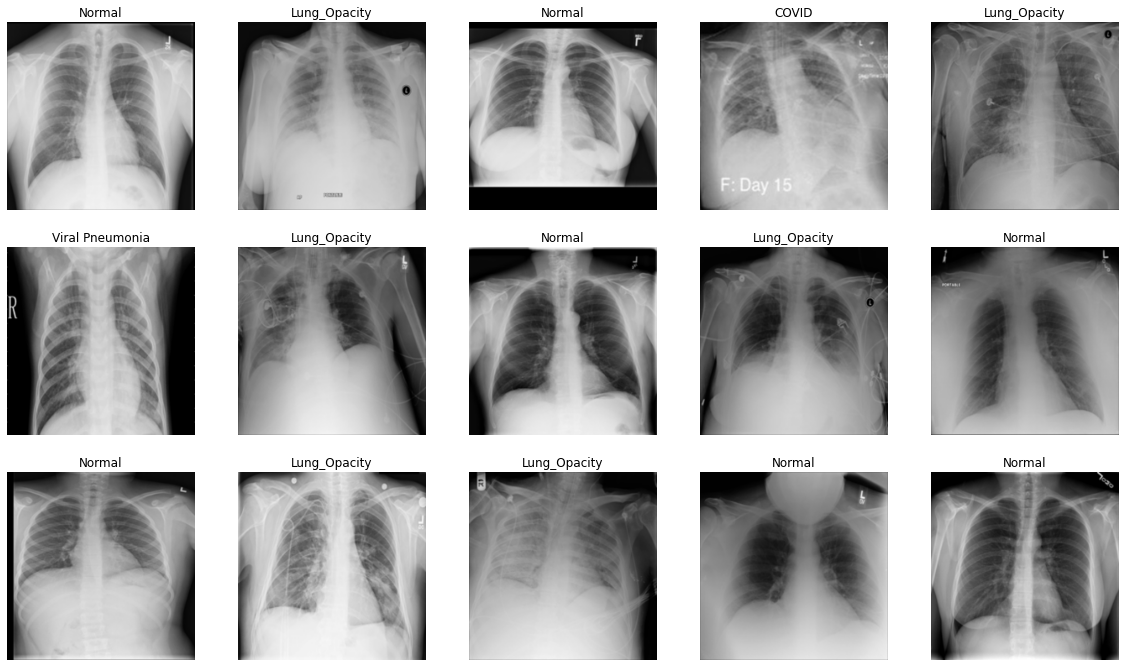

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in data_train.take(1):
    pred = CovidModel.predict(images)
    pred = np.array(list(map(lambda x: np.argmax(x), pred)))
    for i in range(15):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[pred[i]])
        plt.axis("off")

In [ ]:
# Your answer here
sc = StandardScaler()
for i in range(X_train_feats.shape[0]):
  x_sc = sc.fit_transform(X_train_feats[0])
  X_train_feats[i] = x_sc

X_scaled = X_train_feats